In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from pandas import read_csv

C:\Users\Lithium\AppData\Local\Temp\ipykernel_14932\144392997.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import read_csv


In [2]:
#表格中比较稀疏的部分
# need_to_pca = ['p1_double_fault','p2_double_fault','p1_unf_err','p2_unf_err','p1_net_pt','p2_net_pt','p1_net_pt_won','p2_net_pt_won','p1_break_pt','p2_break_pt','p1_break_pt_won','p2_break_pt_won','p1_break_pt_missed','p2_break_pt_missed']
df = read_csv("./2024c/all_data_in_int.csv", index_col=[0])
# df.drop('Unnamed: 0', inplace=True)
need_to_pca = df.columns
# df = df[need_to_pca]

In [3]:
df_normed = (df - df.mean()) / df.std()
pca = PCA(n_components=0.95)
pca.fit_transform(df_normed)
# pca.fit_transform(df)

array([[-3.30745837,  0.00883668, -0.5041561 , ..., -0.83066052,
         0.73244219, -0.80221649],
       [-3.10018301,  0.73639705, -1.16895353, ...,  0.55885523,
        -0.27149612, -0.33295296],
       [-3.05022243,  0.11516371,  0.49740387, ..., -0.55771387,
         0.58706636, -0.80623816],
       ...,
       [ 4.34355884, -1.08084555, -0.25861111, ...,  0.47895304,
        -0.43317762,  0.95208003],
       [ 4.46718062,  0.29628607, -1.47365619, ...,  0.61296849,
        -0.20593314, -0.27225823],
       [ 5.21816645,  2.26902781,  0.64062157, ..., -0.21003706,
        -0.15361508,  0.29974629]])

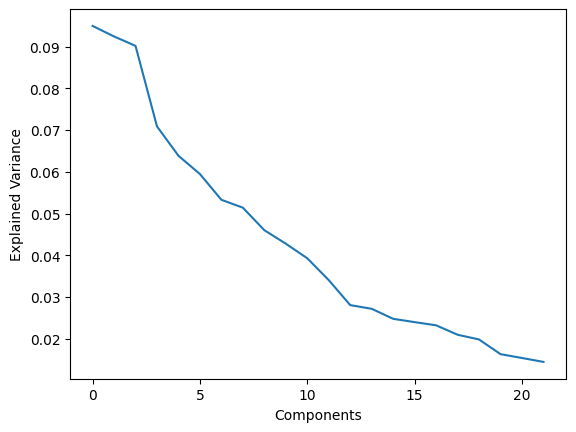

['p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_score', 'p2_score', 'server', 'serve_no', 'point_victor', 'p1_points_won', 'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt']


In [4]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()
explained_variance_ratio = pca.explained_variance_ratio_
n_components = len(explained_variance_ratio)
sorted_labels = [label for _, label in sorted(zip(explained_variance_ratio, need_to_pca), reverse=True)]
print(sorted_labels)